In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/NewspaperData.csv")

In [5]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [6]:
data.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [7]:
data.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

In [8]:
data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [9]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# ***Correlation(corr)***

In [11]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


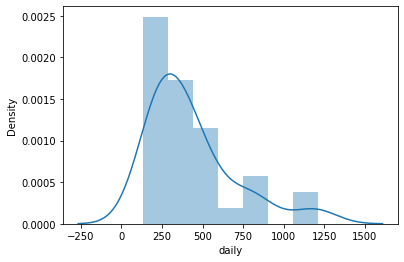

In [12]:
import seaborn as sns
sns.distplot(data["daily"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


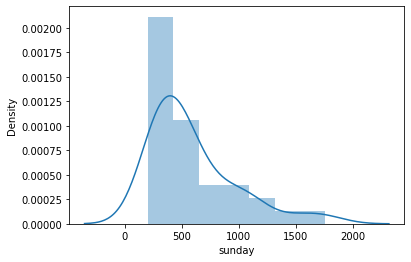

In [13]:
sns.distplot(data["sunday"])

# ***Fitting a Linear Regression Model***

In [14]:
import statsmodels.formula.api as smf #model = Regression Model
model = smf.ols("sunday~daily",data = data).fit()

In [15]:
model.params
#b0 = 13.83  and b1 = 1.33 values

Intercept    13.835630
daily         1.339715
dtype: float64

In [16]:
sun=13.83+1.33*200
sun

279.83

In [18]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

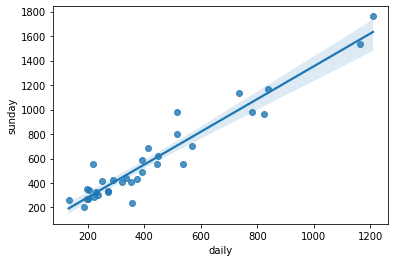

In [19]:
sns.regplot(x="daily",y="sunday",data=data)

In [20]:
print(model.tvalues,"\n" ,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [21]:
newdata = pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [22]:
data_pred = pd.DataFrame(newdata,columns=["daily"])

In [23]:
data_pred

,daily
0,200
1,300


In [24]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64